# The Use of Diffusion Algorithms for the Estimation of Construction Year Within Urban Models

## Annex B: Performance quantification using a OLS model

[M. Esteban Muñoz H.](marcelo.hidalgo@hcu-hamburg.de) &
[Irene Peters](irene.peters@hcu-hamburg.de)

Technical Urban Infrastructure Systems Group, HafenCity University, Hamburg, Germany

#Table of Contents
1. [Load data](#1.-Load-data)
2. [Linear regression](#2.-Linear-regression)
3. [Performance](#3.-Performance)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from random import sample, seed
seed(12346)
%matplotlib inline
from scripts.plots import plotPerformance

# 1. Load data

In [2]:
Buildings = pd.read_hdf('data.h5', 'Buildings')

In [3]:
Buildings.drop(['stadtteil', 'shell', 'neighbours', 'geometry', 'statgeb'], inplace=True, axis=1)

In [4]:
Buildings_known = Buildings.drop(Buildings[Buildings.bja.isnull()].index)

In [5]:
def twochar(x):
    return x[:-2]

In [6]:
Buildings_known["gfk"] = Buildings_known["gfk"].apply(twochar)

coefficients on "a" an "b" would show effect of "a" and "b" relative to "c"

In [7]:
Buildings_known["gfkbaw"] = ["{}-{}".format(a,b) for a,b in zip(Buildings_known["gfk"], Buildings_known["baw"])]

In [8]:
cat = pd.Categorical(Buildings_known["gfkbaw"]).categories

In [9]:
Buildings_s = Buildings_known.sample(int(Buildings.shape[0] * 0.1))

In [10]:
#Buildings_s_index = Buildings_s.index

In [11]:
Buildings_known.drop(Buildings_s.index, inplace=True)

In [12]:
for c in cat:
    row = pd.Series(['','',0.0,0.0,0.0,c],
                    index=Buildings_s.columns, name="delete-me")
    Buildings_s = Buildings_s.append(row.T)

In [13]:
drop_cat = [a for a in pd.Categorical(Buildings_s["gfkbaw"]).categories.tolist() \
            if a not in pd.Categorical(Buildings_known["gfkbaw"]).categories.tolist()]

In [14]:
drop_cat

[]

In [15]:
Buildings_s.drop(Buildings_s.loc[[a in drop_cat for a in Buildings_s.gfkbaw]].index, inplace=True)

In [16]:
#assert(all(pd.Categorical(Buildings_known["gfkbaw"]).categories == pd.Categorical(Buildings_s["gfkbaw"]).categories))

#2. Linear regression

In [17]:
formula = 'bja ~ sqm + shell_wall + C(gfkbaw)'
#formula = 'bja ~ sqm + shell_wall'
model = smf.ols(formula=formula, data=Buildings_known)
result = model.fit()

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bja   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     8.417
Date:                Fri, 30 Oct 2015   Prob (F-statistic):           3.17e-18
Time:                        16:55:11   Log-Likelihood:                -1843.7
No. Observations:                 394   AIC:                             3723.
Df Residuals:                     376   BIC:                             3795.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             1969.5808     10.936    180.105      0.000      1948.078  1991.084
C(gfkbaw)[T.10-2400]    -6.8894     11.264     -0.612      0.541       -29.037    15.259
C(gfkbaw)[T.10-2500]     3.5753     11.288      0.317      0.752       -18.619    25.770
C(gfkbaw)[T.10-None]    11.8594     18.882      0.628      0.530       -25.268    48.987
C(gfkbaw)[T.11-1200]    33.6751     16.173      2.082      0.038         1.874    65.476
C(gfkbaw)[T.11-2400]   -10.6318     11.662     -0.912      0.363       -33.563    12.300
C(gfkbaw)[T.11-2500]     1.0485     11.730      0.089      0.929       -22.017    24.113
C(gfkbaw)[T.11-None]    30.1389     18.881      1.596      0.111        -6.987    67.264
C(gfkbaw)[T.20-None]    23.2750     11.476      2.028      0.043         0.709    45.841
C(gfkbaw)[T.21-None]   -21.4846     21.788     -0.986      0.325       -64.327    21.357
C(gfkbaw)[T.23-None]   -11.5480     14.414     -0.801      0.424       -39.890    16.794
C(gfkbaw)[T.24-None]    34.6734     11.781      2.943      0.003        11.509    57.838
C(gfkbaw)[T.25-None]    36.3642     28.827      1.261      0.208       -20.318    93.047
C(gfkbaw)[T.30-None]     0.6419     13.804      0.047      0.963       -26.502    27.785
C(gfkbaw)[T.32-None]    31.6087     28.814      1.097      0.273       -25.048    88.265
C(gfkbaw)[T.99-None]   -35.3862     18.869     -1.875      0.062       -72.487     1.715
sqm                      0.0004      0.000      1.077      0.282        -0.000     0.001
shell_wall               0.0003      0.001      0.340      0.734        -0.002     0.002
==============================================================================
Omnibus:                      137.228   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.891
Skew:                          -1.625   Prob(JB):                     4.90e-91
Kurtosis:                       6.843   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#3. Performance

In [19]:
dat = Buildings_s.loc[:, ['sqm','shell_wall', 'gfkbaw']]

In [20]:
dat.drop("delete-me", inplace=True)
Buildings_s.drop("delete-me", inplace=True)

In [21]:
estimated = result.predict(dat)
observed = Buildings_s.bja.tolist()
plotData = pd.DataFrame({"Estimated":estimated, "Observed":observed})

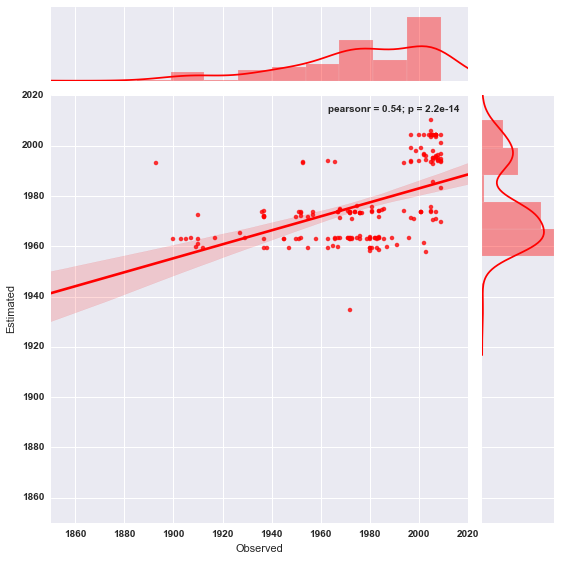

In [22]:
plotPerformance(plotData, sufix="-ols")

In [23]:
np.mean(abs(plotData.Estimated - plotData.Observed))

17.954733562223172

In [24]:
np.std(abs(plotData.Estimated - plotData.Observed))

18.083391418514026